In [1]:
# usual imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# NLP -specific imports

# CountVectorizer => the most simple vectorizing tool for text data 
from sklearn.feature_extraction.text import CountVectorizer

# import the multinomial Naive-Bayes (supports more than 2 outcomes too!)
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv('news.csv')

In [3]:
df

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [4]:
df['Class Index'].value_counts() 

Class Index
3    30000
4    30000
2    30000
1    30000
Name: count, dtype: int64

In [5]:
df['Title'] = df['Title'] + " - " + df['Description'] 

In [6]:
df = df[['Class Index', 'Title']] 

In [7]:
# Пример DataFrame с индексами классов
df['Class Index'] = df['Class Index'].map({
    1: 'World',
    2: 'Sports',
    3: 'Business',
    4: 'Sci/Tech'
})


C:\Users\User\AppData\Local\Temp\ipykernel_9976\706471411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class Index'] = df['Class Index'].map({


In [8]:
labels = ['World', 'Sports', 'Business', 'Sci/Tech']

In [9]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df['Title'])
y = df['Class Index'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [11]:
# create model and train it
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [12]:
predictions = model.predict(X_test) 

In [13]:
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

    Business       0.88      0.86      0.87      5958
    Sci/Tech       0.87      0.88      0.88      6101
      Sports       0.95      0.98      0.97      6039
       World       0.92      0.89      0.91      5902

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



<Axes: >

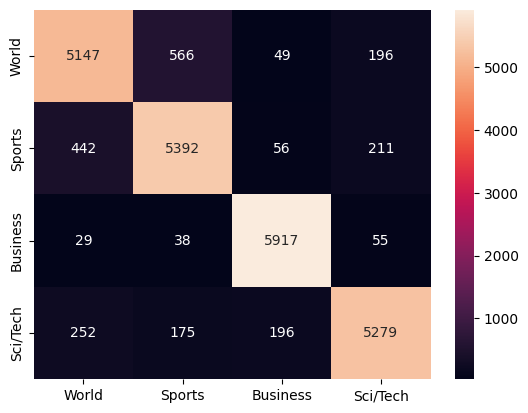

In [14]:
# create confusion matrix and show it
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, fmt="g",
            xticklabels=labels, yticklabels=labels)

In [15]:
np.set_printoptions(precision=8, suppress=True) 

In [16]:
sample_messages = ["Japanese manufacturing sector union members demand record pay hike in 2025",
                   "As Arsenal fizzle out, Liverpool grow stronger - Premier League hits and misses",
                   "Hope for koalas after bushfires - After millions of koalas died in bushfires that swept through Australia, the species now has a glimmer of hope."]

# vectorize the new messages and predict the values
processed_text = vectorizer.transform(sample_messages)
results = model.predict_proba(processed_text)

In [17]:
print("Results for the Naive-Bayes and news article headline classification!")

# amount of the test messages above
amount = len(results)

# loop through each message
for index in range(amount):
    
    row = results[index]
    result = np.argmax(row)
    result_text = labels[result]

    print()
    print(sample_messages[index])
    print(row.astype(float))
    print(result_text)
    print()

Results for the Naive-Bayes and news article headline classification!

Japanese manufacturing sector union members demand record pay hike in 2025
[0.99984248 0.00011807 0.         0.00003944]
World


As Arsenal fizzle out, Liverpool grow stronger - Premier League hits and misses
[0.00003155 0.00000045 0.99983691 0.00013108]
Business


Hope for koalas after bushfires - After millions of koalas died in bushfires that swept through Australia, the species now has a glimmer of hope.
[0.00000071 0.22940223 0.00008141 0.77051565]
Sci/Tech

